Project 1 Jupyter Notebook
========

### Group 4: John Graunt
Authors: Barbara Zeynep (Zeynep) Ganley, Edward Shen, Ivan Chan, Natalie Cornejo

In this notebook, we'll be introducing population functions, population pyramid functions, and more in order to examine the dependency ratio between rural and urban countries using data analysis. The dataset we used is the WBData Population dataset, and the dataset is available at https://wbdata.readthedocs.io. We primarily aim to analyze the dependency ratios using population pyramids and other visualizations.

### Set up & Imports
Below are all necessary imports and pip installs for the rest of this project.

In [22]:
# Uncomment the code to install
#!pip install wbdata
#!pip install cufflinks

import wbdata
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()

## Population Function, <span style="color: red;">*Deliverable 1[A] - Population Statistics* <a name="population-f"></span></a>

The population function takes in four arguments:
-   **year (int):** The specified year, works from 1960 to 2024.
-   **sex (str):** Accepts any of the three variations ("People", "Male", "Female"). The function will auto-check if the input corresponds to any of the three options.
-   **age_range (array):** An array with length of 2, 2 integers. Please be aware that integers above **80** will be the same since data availability only provides general statistics for 80 or above.
-   **place (str):** A specific country or region of interest. Ideally, this should be a 3-digit country code, although the function try auto-match a location based on your input.

#### Some Helper Functions used in the population function

In [15]:
# Helper functions
# place_Finder Search and Match input string to the location of interest available
# Output: 3-digit country code
def place_Finder(place):
    # From the list of available countries, search to see if the user input 'place' matches any of them.
    # If not, raise an error
    # Code inspired by previous projects
    countries = wbdata.get_countries()
    country_dict = {}

    # Create a location id with name dictionaries for later search.
    for location in countries:
        code = location['id']
        name = location['name']
    
        country_dict[name] = code

    # Nested if statements to make sure it returns either a correct country code or an error message.
    if place in country_dict:
        return country_dict[place]
    elif place in country_dict.values():
        return place
    else:
        raise ValueError(f"The region '{place}' is not valid. Please try again")

# age_list: Organize input age_range array to create a list of five-year age group strings
# Output: List of five-year age group strings
def age_list(age_range):
    # Compute the correct start and end ages that the dataset accepts
    start = age_range[0] - (age_range[0] % 5)
    end = age_range[1] + (4 - age_range[1] % 5)

    # Generate the list
    results = []
    while start < min(end, 80):
        low = str(start).zfill(2)
        high = str(start + 4).zfill(2)
        results.append(f"{low}{high}")
        start += 5

    # Case when it's 80 or above
    if start >= 80:
        results.append('80UP')
    return results

#### Delieverable: population function

In [44]:
# Deliverable: Population Function
def population(year, sex, age_range, place):
    """Your doc-string here"""
    # Make sure place_code is a valid 3-digit code, even if the user input is a valid country code.
    place_code = place_Finder(place)
    age_labels = age_list(age_range)
    year = str(year)
    population = 0

    # Loop each age label to get each age range's population
    for i in age_labels:
        # indicators
        male_ind = f"SP.POP.{i}.MA"
        female_ind = f"SP.POP.{i}.FE"

        df = wbdata.get_dataframe({male_ind: "Male", female_ind: "Female"}, country=place_code)
        df = df.reset_index()
        df = df[df["date"] == year]

        # Make sure to skip the age range if it doesn't have data
        if not df.empty:
            male_pop = int(df["Male"].fillna(0).iloc[0])
            female_pop = int(df["Female"].fillna(0).iloc[0])
        else:
            print(f"Skipping {i}: No data for {year}.")

        # Determine sex Input and increase the population accordingly
        s = sex.casefold()
        if s == "people" or s == "all":
            population += male_pop + female_pop
        elif s == "male":
            population += male_pop
        elif s == "female":
            population += female_pop

    #"In [year], how many [people/males/females] aged [low] to [high] were living in [the world/region/country]?"
    #return place_code, age_labels, population # Test Only
    # Special Case: Add "the" before "world"
    prefix = "the " if "world" in place.casefold() else ""
    
    print(f"In {year}, there are {population:,} {sex.casefold()} aged {age_range[0]} to {age_range[1]} were living in {prefix}{place}.")
    return population

#### Example

In [45]:
population (year=2000, sex='all', age_range=(3,50), place='CHN')

In 2000, there are 1,089,190,808 all aged 3 to 50 were living in CHN.


1089190808

## Unit Test, <span style="color: red;">*Deliverable 2[A] - Unit Tests* <a name="population-f"></span></a>
In this section, we verify with unit tests to ensure that all of our deliverable functions work properly.

In [73]:
def population_testing ():
    # Look at if the population of the world is correct

    # checks if female pop above 0 
    assert population (year=2000, sex='Female', age_range=(0, 100), place='WLD')>0, "too few females"
    # checks if male pop lower than world pop
    assert population (year=2000, sex='Male', age_range=(0,100), place='WLD') < 7e9 , "number of males incorrect"

    ## Look at whether the population of Japan is correct 
    # checks if population in japan is greater than 10M 
    assert population (year=2000, sex='all', age_range=(0,100), place='JPN')>1e7, "population too low"
    # checks if japan elderly male population is less than 3M 
    assert population (year=2000, sex='Male', age_range=(80,100), place='JPN') < 3e6, "population too high" 
    
    ## Look at whether the population of Niger is correct
    # checks if population in niger is greater than 10M   
    assert population (year=2000, sex='all', age_range=(0,100), place='NER')>1e7, "population too low" 
    # checks if youth population in niger is greater than 8M
    assert population (year=2000, sex='all', age_range=(0,20), place='NER') < 8e6, "population too high" 

    # Look at an additional country for reference 
    # Checks if population fo australia is higher than 6M
    assert population(year=1966, sex='Female', age_range=(0, 100), place='Australia') < 6e6, "population too high" 

    print ("Unit Tests Passed")

population_testing()


In 2000, there are 3,064,550,717 female aged 0 to 100 were living in WLD.
In 2000, there are 3,097,334,130 male aged 0 to 100 were living in WLD.
In 2000, there are 126,843,000 all aged 0 to 100 were living in JPN.
In 2000, there are 1,543,438 male aged 80 to 100 were living in JPN.
In 2000, there are 11,509,636 all aged 0 to 100 were living in NER.
In 2000, there are 7,610,983 all aged 0 to 20 were living in NER.
In 1966, there are 5,783,561 female aged 0 to 100 were living in Australia.
unit tests passed


## Visualizations, <span style="color: red;">*Deliverable 7[C] - Other Visualizations* <a name="population-f"></span></a>
In this section, we visualize different statistics from the wbdata dataset, which would be useful for our research question.

#### Set Up

In [26]:
pd.options.plotting.backend = 'plotly'

countries = {"JPN":"Japan",
             "NER":"Niger"
            }
Japan = {"JPN":"Japan"}
Niger = {"NER":"Niger"}

#### General Information - Total Population

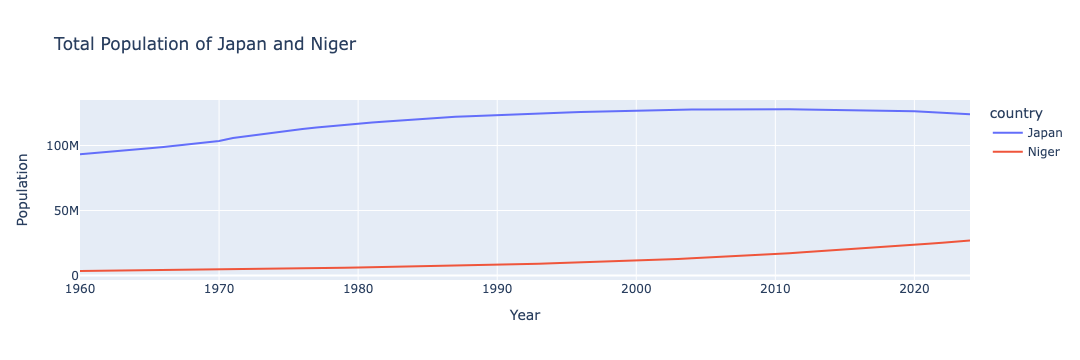

In [40]:
variable_labels = {"SP.POP.TOTL":"Population"}
df = wbdata.get_dataframe(variable_labels, country = countries, parse_dates=True).squeeze()

df = df.unstack('country')
df = df.sort_index()

df.plot(title="Total Population of Japan and Niger",
                       labels=dict(value="Population",date='Year'))

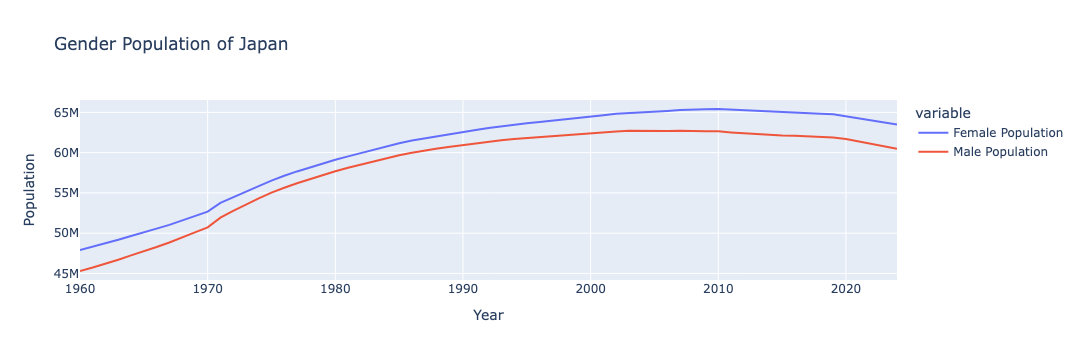

In [42]:
# Between Gender in Japan
variable_labels = {"SP.POP.TOTL.FE.IN": "Female Population",
                   "SP.POP.TOTL.MA.IN": "Male Population"}

df = wbdata.get_dataframe(variable_labels, country = Japan).squeeze()

df.index = df.index.astype(int)

df.plot(title="Gender Population of Japan",
                       labels=dict(value="Population",date='Year'))

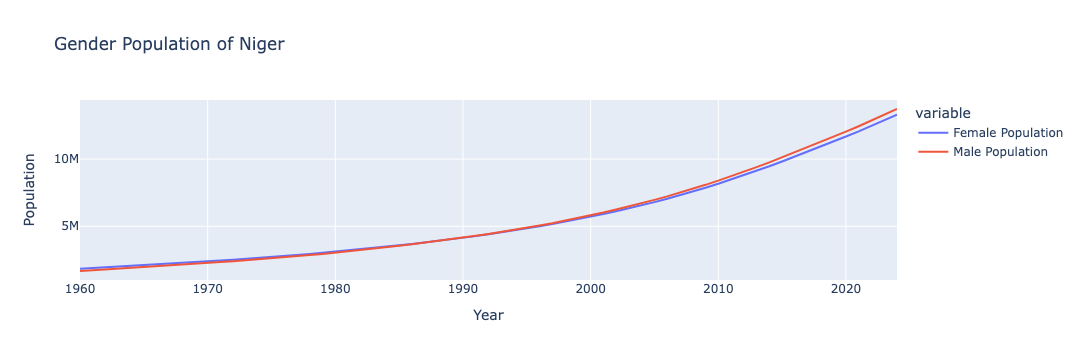

In [41]:
# Between Gender in Niger
variable_labels = {"SP.POP.TOTL.FE.IN": "Female Population",
                   "SP.POP.TOTL.MA.IN": "Male Population"}

df = wbdata.get_dataframe(variable_labels, country = Niger).squeeze()

df.index = df.index.astype(int)

df.plot(title="Gender Population of Niger",
                       labels=dict(value="Population",date='Year'))

#### Urban vs. Rural Population

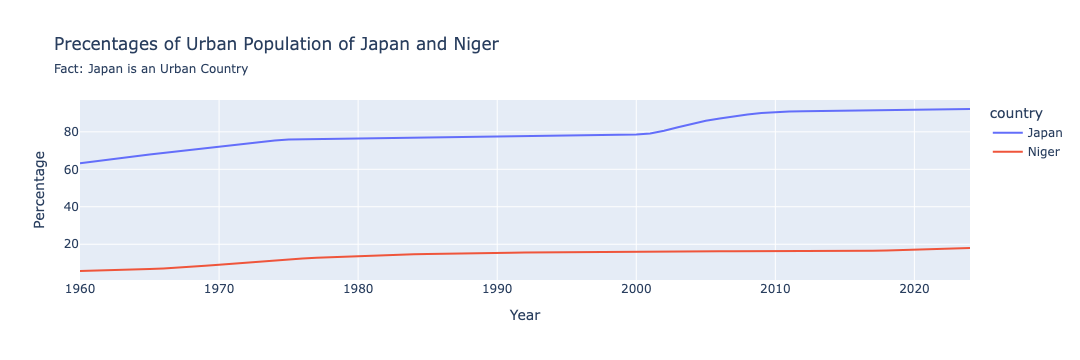

In [50]:
# Urban Population
variable_labels = {"SP.URB.TOTL.IN.ZS":"Precentages of Urban Population"}
df = wbdata.get_dataframe(variable_labels, country = countries, parse_dates=True).squeeze()

df = df.unstack('country')
df = df.sort_index()

df.plot(title="Precentages of Urban Population of Japan and Niger",
        subtitle="Fact: Japan is an Urban Country",
                       labels=dict(value="Percentage",date='Year'))

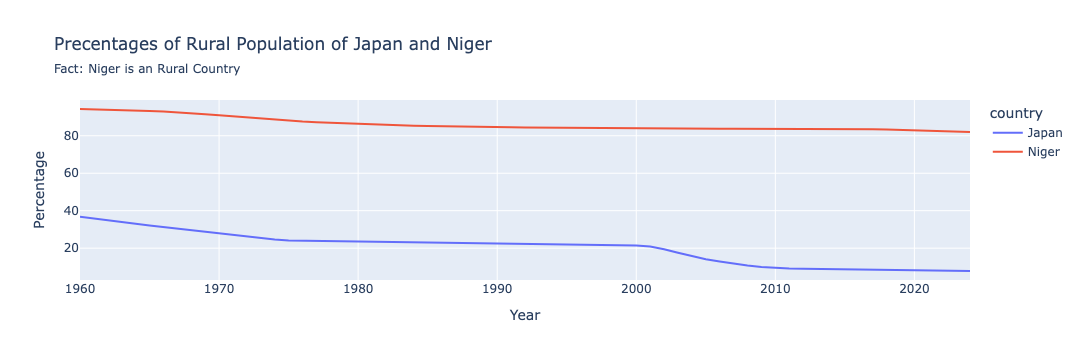

In [51]:
# Rural Population
variable_labels = {"SP.RUR.TOTL.ZS":"Precentages of Rural Population"}
df = wbdata.get_dataframe(variable_labels, country = countries, parse_dates=True).squeeze()

df = df.unstack('country')
df = df.sort_index()

df.plot(title="Precentages of Rural Population of Japan and Niger",
        subtitle="Fact: Niger is an Rural Country",
                       labels=dict(value="Percentage",date='Year'))

#### Dependency Ratios between Japan and Niger

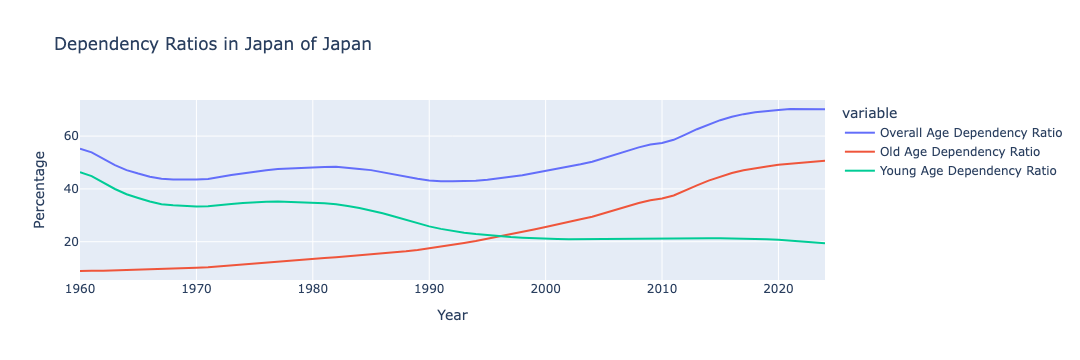

In [53]:
# Dependency Ratio in Japan
variable_labels = {"SP.POP.DPND": "Overall Age Dependency Ratio",
                   "SP.POP.DPND.OL": "Old Age Dependency Ratio",
                   "SP.POP.DPND.YG": "Young Age Dependency Ratio"}

df = wbdata.get_dataframe(variable_labels, country = Japan).squeeze()

df.index = df.index.astype(int)

df.plot(title="Dependency Ratios in Japan of Japan",
                       labels=dict(value="Percentage",date='Year'))

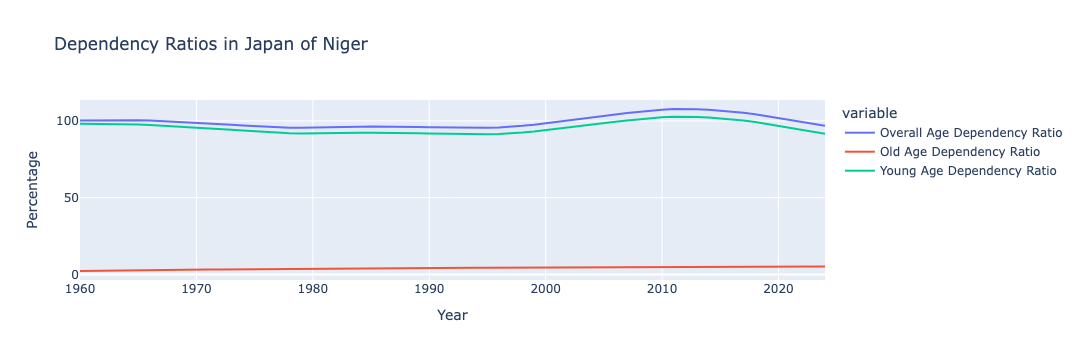

In [54]:
# Dependency Ratios in Niger
variable_labels = {"SP.POP.DPND": "Overall Age Dependency Ratio",
                   "SP.POP.DPND.OL": "Old Age Dependency Ratio",
                   "SP.POP.DPND.YG": "Young Age Dependency Ratio"}

df = wbdata.get_dataframe(variable_labels, country = Niger).squeeze()

df.index = df.index.astype(int)

df.plot(title="Dependency Ratios in Japan of Niger",
                       labels=dict(value="Percentage",date='Year'))